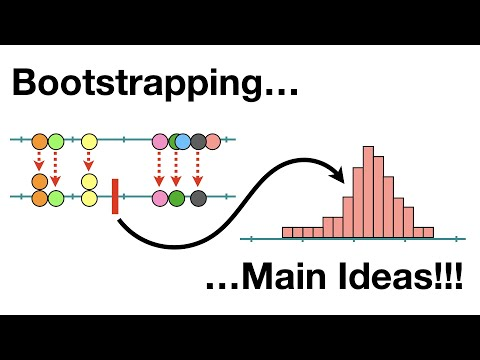

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Question 1:

What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture?

Standard error of the mean refers to the standard deviation of the projected means after bootstrapping - NOT the original data.

Standard error of the mean returns, given a very large number of trials to obtain the data (using bootstrapping), the deviation of a given mean of a trial from the mean of means of all trials

Standard deviation returns, given a dataset, the average deviation of a value from the mean.

Question 2:

step 1: calculate the mean of the sample

step 2: calculate the standard error of the mean

step 3: determine the critical value - which is the "how many standard deviations from the mean one needs" in order to capture the desired percentage of values. For 95% confidence, crit. value = 1.96.

step 4: compute the confidence interval - where CI = crit.value x standard error of the mean

step 5: you are done!

Question 3

step 1: Boostrap very many samples and create a histogram of the count of means for each sample

step 2: identify the values at the 2.5th and 97.5th percentiles: they will be bounds

step 3: the interval between these values represents the 95% confidence interval.

In [2]:
# Question 4

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data[:, 0]  # Taking the first feature (sepal length) for this example

# Function to compute bootstrap confidence interval
def bootstrap_ci(data, num_samples=1000, alpha=0.05):
    means = []
    
    # Generate bootstrap samples and compute their means
    for _ in range(num_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    
    # Calculate the lower and upper percentiles
    lower_bound = np.percentile(means, 100 * (alpha / 2))
    upper_bound = np.percentile(means, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Compute the bootstrap confidence interval for the population mean
confidence_interval = bootstrap_ci(data, num_samples=1000, alpha=0.05)
print(f"95% Bootstrap Confidence Interval for the Population Mean: {confidence_interval}")

95% Bootstrap Confidence Interval for the Population Mean: (5.7166500000000005, 5.98335)


This code, according to Chat GPT, can be modified by writing (median) in the place of mean wherever it appears in the code. 

In [3]:
# Question 4

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data[:, 0]  # Taking the first feature (sepal length) for this example

# Function to compute bootstrap confidence interval for the median
def bootstrap_ci_median(data, num_samples=1000, alpha=0.05):
    medians = []
    
    # Generate bootstrap samples and compute their medians
    for _ in range(num_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(sample))
    
    # Calculate the lower and upper percentiles
    lower_bound = np.percentile(medians, 100 * (alpha / 2))
    upper_bound = np.percentile(medians, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Compute the bootstrap confidence interval for the population median
confidence_interval_median = bootstrap_ci_median(data, num_samples=1000, alpha=0.05)
print(f"95% Bootstrap Confidence Interval for the Population Median: {confidence_interval_median}")


95% Bootstrap Confidence Interval for the Population Median: (5.6, 6.0)


Question 5

Distinguishing between population parameters and sample statistics:

- clarifies the objectives of the analysis
- helps in constructing and interpretating confidence intervals

the distinction between pop. parameters and sample statistics emphasizes that while sample statistics provide useful estimates, they are subject to variability and uncertainty. We us confidence intervals to quantifying that uncertainty.

Question 6

What is the process of bootstrapping?

To bootstrap, we will create a new sample based on the one we already have. Start by taking a your data with n elements of data. Then pick at random one element from them and add them to the new sample. repeat this process n times, so your new data has as many elements as your original. you have now made a new sample based off the original. repeat this entire process many, many times.

What is the main purpose of bootstrapping?

to obtain a better idea of population parameters and to construct confidence intervals

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

bootstrap x times, where x times n is your population size.

SUMMARY OF CHAT UP TILL NOW

Sure! Here’s a summary of our conversation:

Standard Error of the Mean and Confidence Intervals:

You asked how to use the standard error of the mean (SEM) to create a 95% confidence interval that covers 95% of bootstrapped sample means.
I explained the steps, including calculating the sample mean, SEM, finding the critical value (1.96 for a 95% confidence level), and computing the confidence interval using the formula 

Clarification on Critical Values:

You sought clarification on step 3 regarding the critical value of 1.96, which captures 95% of the data in a normal distribution. I elaborated on the concept of critical values, their relationship to confidence intervals, and how they are used to define the range of uncertainty around the mean.
Bootstrapped Confidence Intervals:

You then inquired about creating a 95% bootstrapped confidence interval directly from bootstrapped means, without using the standard deviation to estimate the standard error.
I provided concise steps: performing bootstrap sampling, sorting the bootstrapped means, determining the 2.5th and 97.5th percentiles, and extracting the confidence interval from these values.
If you need any further details or have more questions, feel free to ask!

link: https://chatgpt.com/share/66ff2f04-bc34-8006-b671-500b50d00973

Question 7

Failing to Reject H₀: Occurs when the confidence interval overlaps zero because it indicates that zero is a plausible value for the population mean, despite the sample mean being non-zero.

Rejecting H₀: Occurs when the confidence interval does not overlap zero, suggesting that the sample provides sufficient evidence to conclude the population mean is significantly different from zero.

Question 8:

To analyse this data, I will: 

1. Print the dataset (just so I can see what it is I'm working with)
2. Graph the dataset to show the change in a patient's health before the vaccine and after the vaccine (This is the important data in the dataset, It's what we want to know. Graphing it will make visualizing the data easy.
3. Use bootstraping to simulate population and create a confidence interval of 95%


Problem Introduction: 
    This dataset shows the health scores of patients before and after taking a vaccine. We are to establish wether or not, statistically, the vaccine improves a person's health.


An explaination of the meaning of a Null Hypothesis of "no effect" in this context:
    A Null Hypothesis of "no effect" means there is no significant difference observed. This occurs when the mean is relatively close to 0 for this case.

Data Visualization (motivating and illustrating the comparison of interest)

Quantitative Analysis:

    Original sample:
- Mean Change in Health Score:  3.30
- Median Change in Health Score: 4.00
- Standard Deviation of Change in Health Score: 4.03

    Bootstraped Samples:
- Mean Change in Health Score: 3.28
- Median Change in Health Score: 3.3
- Standard Deviation of Change in Health Score: 1.2001196247041377

Methodology Code and Explanations and Supporting Visualizations:
    Explanations to be found at top of this markdown box and all code used below

Findings and Discussion:
    We can say with 95% confidence that this vaccine with improve your health. we can say this, as 0 is outside of the confidence interval.

In [4]:
# Question 8

# showing dataset:

import pandas as pd

# Define the dataset
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


In [5]:
import pandas as pd

# Define the dataset
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the change in health scores
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Calculate mean, median, and standard deviation of the change
mean_change = df['HealthScoreChange'].mean()
median_change = df['HealthScoreChange'].median()
std_dev_change = df['HealthScoreChange'].std()

# Print the results
print(f'Mean Change in Health Score: {mean_change:.2f}')
print(f'Median Change in Health Score: {median_change:.2f}')
print(f'Standard Deviation of Change in Health Score: {std_dev_change:.2f}')


Mean Change in Health Score: 3.30
Median Change in Health Score: 4.00
Standard Deviation of Change in Health Score: 4.03


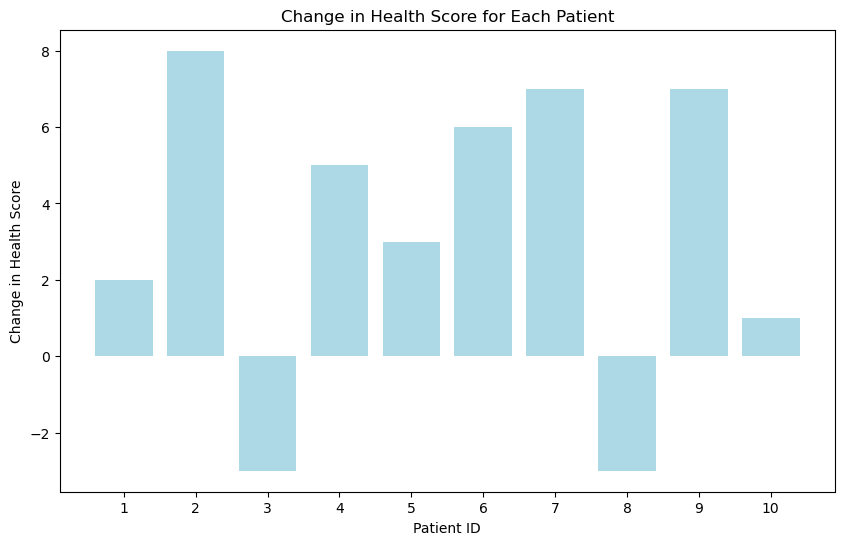

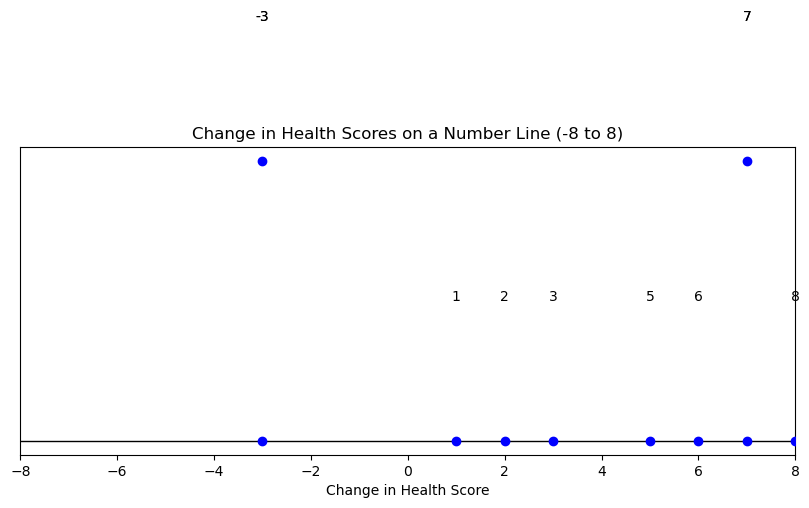

In [11]:
# Question 8

# Showing difference in health of patients before and after: using Bar Plot and Number Line (as shown in video)

import pandas as pd
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the change in health scores
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(df['PatientID'], df['HealthScoreChange'], color='lightblue')
plt.xlabel('Patient ID')
plt.ylabel('Change in Health Score')
plt.title('Change in Health Score for Each Patient')
plt.xticks(df['PatientID'])
plt.show()

from collections import Counter

# Calculate the change in health scores
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Count how many times each change in health score occurs
score_change_counts = Counter(df['HealthScoreChange'])

# Set up the plot
plt.figure(figsize=(10, 4))  # Horizontal figure

# Loop through the unique health score changes and plot them
for change, count in score_change_counts.items():
    # Plot all points vertically stacked if there are multiple points for the same change
    for i in range(count):
        plt.scatter(change, 1 + i * 0.1, color='blue', zorder=5)

# Add labels for each patient's change in health score
for i, change in enumerate(df['HealthScoreChange']):
    plt.text(change, 1.05 + (score_change_counts[change] - 1) * 0.1, 
             f'{change}', horizontalalignment='center')

# Add number line and labels
plt.axhline(y=1, color='black', linestyle='-', linewidth=1)  # Number line
plt.xlim(-8, 8)  # Set limits from -8 to 8
plt.yticks([])  # Hide y-axis ticks

# Add x-axis labels
plt.xlabel('Change in Health Score')
plt.title('Change in Health Scores on a Number Line (-8 to 8)')

# Show the plot
plt.show()

Bootstrap Mean Estimate: 3.30
95% Confidence Interval: [0.80, 5.50]


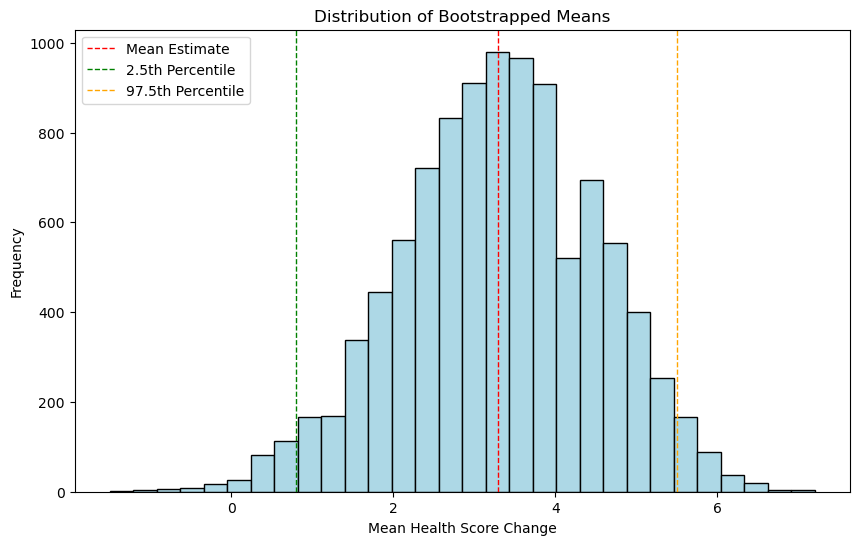

In [7]:
# Question 8

# Bootstrapping and creating a confidence interval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the change in health scores
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping function
def bootstrap(data, n_iterations, statistic):
    """Perform bootstrapping on the given data."""
    samples = np.random.choice(data, (n_iterations, len(data)), replace=True)
    stat_samples = np.array([statistic(sample) for sample in samples])
    return stat_samples

# Number of bootstrap iterations
n_iterations = 10000

# Perform bootstrapping on the changes
bootstrapped_means = bootstrap(df['HealthScoreChange'], n_iterations, np.mean)

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)
mean_estimate = np.mean(bootstrapped_means)

# Print results
print(f'Bootstrap Mean Estimate: {mean_estimate:.2f}')
print(f'95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]')

# Optional: Plot the distribution of bootstrapped means
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_means, bins=30, color='lightblue', edgecolor='black')
plt.axvline(mean_estimate, color='red', linestyle='dashed', linewidth=1, label='Mean Estimate')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=1, label='2.5th Percentile')
plt.axvline(upper_bound, color='orange', linestyle='dashed', linewidth=1, label='97.5th Percentile')
plt.title('Distribution of Bootstrapped Means')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [8]:
std_dev_estimate = np.std(bootstrapped_means)
std_dev_estimate

1.21054351887902

In [9]:
median_estimate = np.median(bootstrapped_means)
median_estimate

3.3

SUMMARY OF CHAT:
    
    Bootstrap Confidence Intervals:

You inquired about how to create a 95% bootstrap confidence interval for various population parameters (mean, median) using Python.
We discussed the distinction between population parameters and sample statistics in the context of confidence intervals.
Bootstrapping:

You asked why bootstrapping is used, and how it helps assess the plausibility of a hypothesized population average using sample data.
We also discussed the significance of confidence intervals overlapping zero and what it implies about the null hypothesis.
Data Handling:

You provided a dataset with patient health scores and asked how to read and manipulate it in Python.
I showed you how to save this dataset as a CSV file and how to visualize the changes in health scores on a number line.
Health Score Change Visualization:

We discussed how to represent changes in health scores on a number line, ensuring that points were placed according to the change in scores, ranging from -8 to 8.
Statistical Analysis:

You requested code to compute the mean, median, and standard deviation of the change in health scores from the dataset.
We added bootstrapping to the analysis to calculate confidence intervals, as well as the standard deviation and median of bootstrapped means.
Code Samples:

Throughout the conversation, I provided Python code snippets to perform various tasks such as bootstrapping, calculating statistics, and visualizing data.

link: https://chatgpt.com/share/66ff30bf-a4c8-8006-9580-caab2a89a591

Question 9: Yes